In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

file_path = 'titanic.csv'
df = pd.read_csv(file_path)

df.head()
#df.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


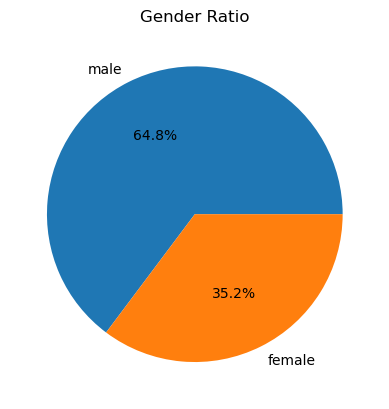

In [5]:
gender_counts = df['Sex'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Ratio')
plt.show()

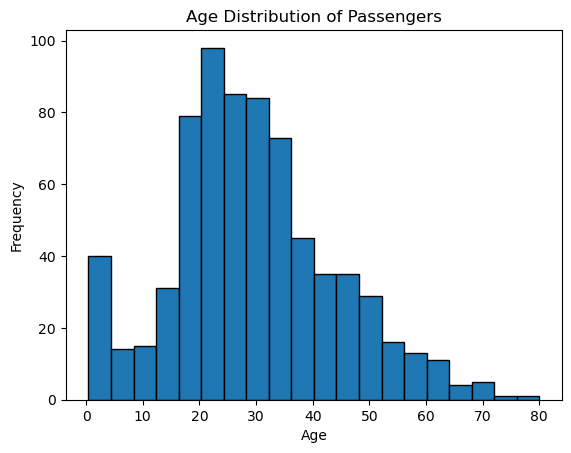

In [7]:
plt.hist(df['Age'].dropna(), bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Passengers')
plt.show()

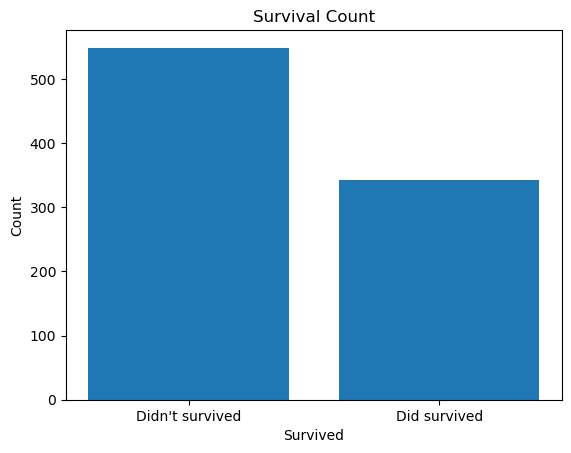

In [9]:
survival_counts = df['Survived'].value_counts()
plt.bar(survival_counts.index, survival_counts.values)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Count')
plt.xticks([0, 1], ["Didn't survived", "Did survived"])
plt.show()

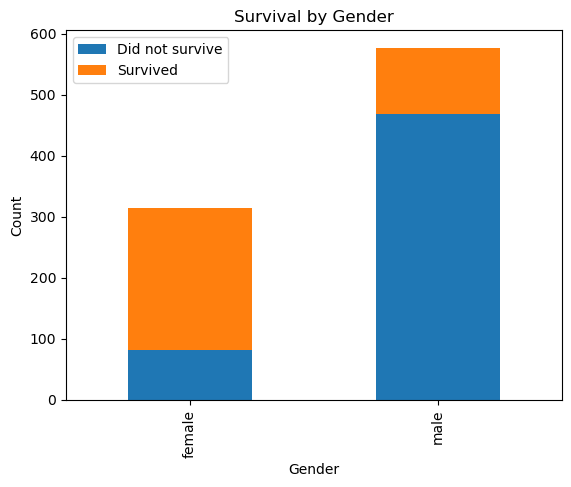

In [10]:
survival_gender = df.groupby(['Sex', 'Survived']).size().unstack()
survival_gender.plot(kind='bar', stacked=True)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Survival by Gender')
plt.legend(['Did not survive', 'Survived'])
plt.show()

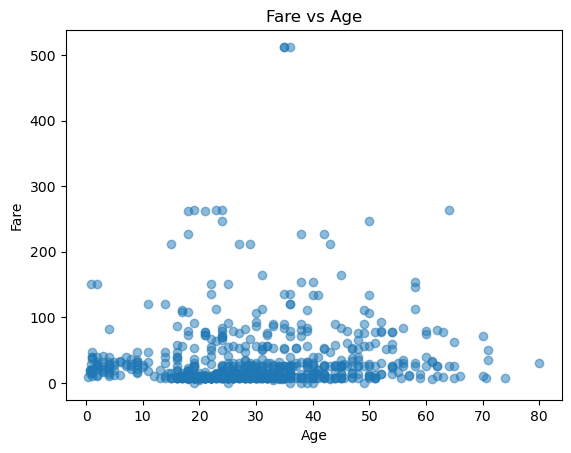

In [11]:
plt.scatter(df['Age'], df['Fare'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Fare vs Age')
plt.show()

In [ ]:
# Calculate the median age
median_age = df['Age'].median()

# Replace missing values in 'Age' with the median
df['Age'].fillna(median_age, inplace=True)

In [ ]:
scaler = MinMaxScaler()
df['Fare_normalized'] = scaler.fit_transform(df['Fare'].values.reshape(-1, 1))

In [ ]:
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

In [13]:
survival_rate_gender = df.groupby('Sex')['Survived'].mean()
survival_rate_gender

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [14]:
survival_rate_class = df.groupby('Pclass')['Survived'].mean()
survival_rate_class

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [15]:
idx_highest_fare = df['Fare'].idxmax()

passenger_highest_fare = df.loc[idx_highest_fare]

passenger_highest_fare

PassengerId                 259
Survived                      1
Pclass                        1
Name           Ward, Miss. Anna
Sex                      female
Age                        35.0
SibSp                         0
Parch                         0
Ticket                 PC 17755
Fare                   512.3292
Cabin                       NaN
Embarked                      C
Name: 258, dtype: object